# Analysis of Ford GoBike sharing service
## by Qudus Adeyemi

## Investigation Overview
> The purpose of this presentation is to disseminate business insights obtained from the Ford GoBike bike-sharing service. The important findings listed below will be conveyed in this presentation:
- The users who spend the most time using the service
- The people who use it the most frequently
- The usage patterns on weekdays and weekends
- The locations they frequent the most.
 


## Dataset Overview

> Ford GoBike System Data: This data set contains details about each ride taken in a bike-sharing program that serves the greater San Francisco Bay area. 174952 bikes and 16 features are part of the dataset. Two more features were created to aid the research, bringing the total number of features to 18.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford_clean.csv')

## Usage Pattern by duration and frequency
- Customers' usage habits continue to be the same over time, while subscribers' numbers are on the decline on the weekends but on the rise during the week.
- The customers spends more time on the service on weekends more than weekdays and in general they spend more time than the subscribers 
- The subscribers spend more time on weekends, while their weekday usage remains consistent.

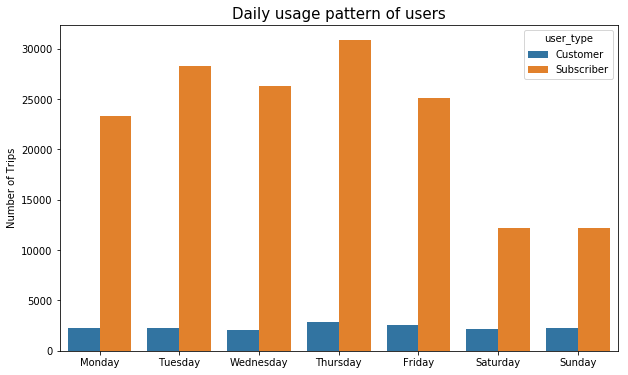

In [3]:
# Shows daily usage of different users
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,6))
ax = sb.countplot(data = df, x = 'day', hue = 'user_type',order=days)
plt.title('Daily usage pattern of users', fontsize=15)



plt.ylabel('Number of Trips')
plt.xlabel("");

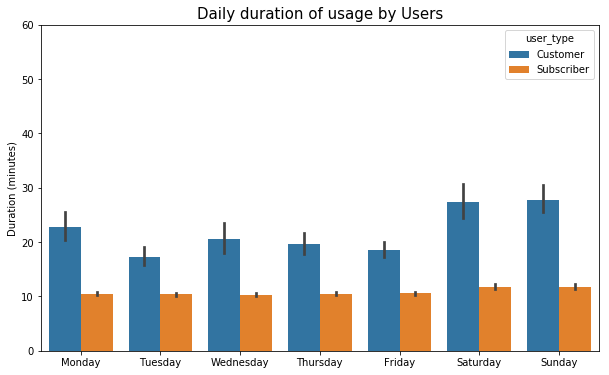

In [4]:
plt.figure(figsize=(10,6))
sb.barplot(data=df, x='day', y='duration_min',hue='user_type',order=days)
plt.ylim(0,60)

plt.title('Daily duration of usage by Users', fontsize=15)
plt.xlabel('')
plt.ylabel('Duration (minutes)');

## Usage Frequency by user type
- About ten times as many subscribers use the service as customers do.



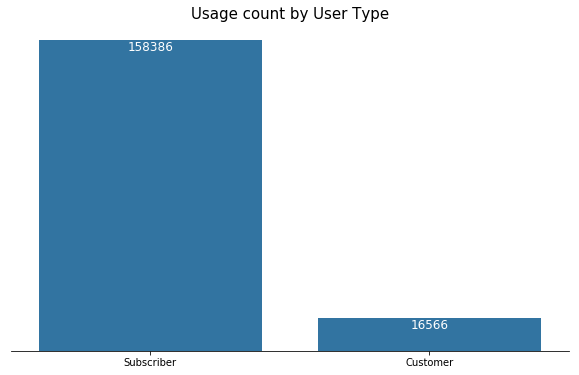

In [5]:
#shows number of users 

plt.figure(figsize=(10,6))
base_color=sb.color_palette()[0]
order = df['user_type'].value_counts().index
ax = sb.countplot(data=df,x='user_type',color=base_color,
            order=order)
plt.title('Usage count by User Type', fontsize=15)


# add annotations
n_points = df.shape[0]
div_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = div_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

## Most Popular Origin Destination by User type

- The most popular origin destination for subscribers is Berry St at 4th St - San Francisco Ferry Building (Harry Bridges Plaza)

- The most popular origin destination for Customers is San Francisco Ferry Building (Harry Bridges Plaza) - The Embarcadero at Sansome St

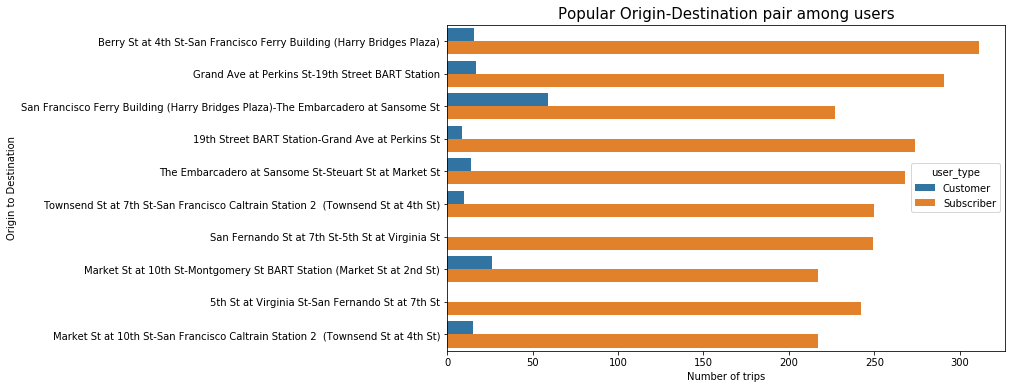

In [6]:

plt.figure(figsize=(10,6))
ax = sb.countplot(data = df, y = 'origin-destination', hue = 'user_type',
            order=df['origin-destination'].value_counts().iloc[:10].index)
plt.title('Popular Origin-Destination pair among users', fontsize=15)


plt.xlabel('Number of trips')
plt.ylabel('Origin to Destination');

